# Problem Statement
In an Organization, salary of an employee depends upon various different factors. Based on the given data, build a model using Simple linear regression to predict the salary of an employee based upon the experience (in years) of the employee. 

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

### reading the CSV file into pandas dataframe

In [2]:
salary_df = pd.read_csv("Salary_Data.csv")  

In [3]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Data structure

In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


### Data Summary

In [5]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Data Distribution

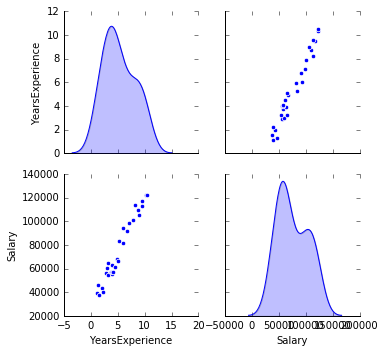

In [6]:
sns.pairplot(salary_df, diag_kind='kde')  

### Correlation Plot

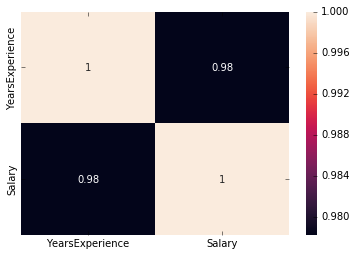

In [7]:
sns.heatmap(salary_df.corr(),annot=True)

### Train Test Split

In [8]:
X=salary_df.YearsExperience
y=salary_df.Salary

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Option 1 - using sklearn.linear_model

In [9]:
# invoke the LinearRegression function and find the bestfit model on training data
print('X Train Shape: ',X_train.shape)




X Train Shape:  (21,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Coefficient of YearsExperience

The coefficient for YearsExperience is 9202.233598254636


### Intercept

In [11]:



print("The intercept is {}".format(intercept))

The intercept is 26049.577715443353


### Rsquare

In [12]:
# On the training data



0.960775692121653

In [13]:
regression_model.score(np.array(X_test).reshape(len(X_test), 1), y_test)

0.9248580247217076

### Option 2 -  using Statsmodel

In [14]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,YearsExperience,Salary
22,7.9,101302.0
23,8.2,113812.0
4,2.2,39891.0
2,1.5,37731.0
25,9.0,105582.0


In [15]:
# Fit the OLS model and get the params





Intercept          26049.577715
YearsExperience     9202.233598
dtype: float64

In [16]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     465.4
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           8.01e-15
Time:                        22:19:04   Log-Likelihood:                -210.64
No. Observations:                  21   AIC:                             425.3
Df Residuals:                      19   BIC:                             427.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.605e+04   2487.895     

### Mean Squared Error

In [17]:
mse = np.mean((regression_model.predict(np.array(X_test).reshape(9, 1))-y_test)**2)

In [18]:
import math

math.sqrt(mse)

6256.134269625979

In [19]:
y_pred = regression_model.predict(np.array(X_test).reshape(9, 1))

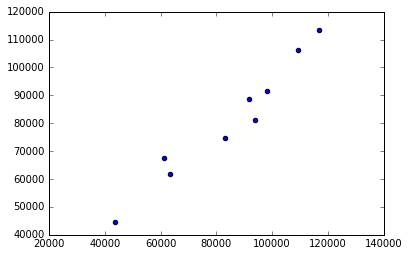

In [20]:
plt.scatter(y_test, y_pred)